In [1]:
import pylab
%matplotlib inline

In [2]:
class Location(object):
    
    def __init__(self, x, y):
        """x and y are floats"""
        self.x = x
        self.y = y
        
    def move(self, deltaX, deltaY):
        """deltaX and deltaY are floats"""
        return Location(self.x + deltaX, self.y + deltaY)
    
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def distFrom(self, other):
        ox = other.x
        oy = other.y
        xDist = self.x - ox
        yDist = self.y - oy
        return (xDist**2 + yDist**2)**0.5
    
    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

class Field(object):
    
    def __init__(self):
        self.drunks = {}
        
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc
            
    def moveDrunk(self, drunk):
        if not drunk in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        #use move method of Location to get new location
        self.drunks[drunk] = currentLocation.move(xDist, yDist)
        
    def getLoc(self, drunk):
        if not drunk in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

import random

class Drunk(object):
    def __init__(self, name):
        self.name = name
    def __str__(self):
        return 'This drunk is named ' + self.name
    
class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices =\
            [(0.0,1.0), (0.0,-1.0), (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

In [3]:
def walk(f, d, numSteps):
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return(start.distFrom(f.getLoc(d)))

# def simWalks(numSteps, numTrials):
#     homer = UsualDrunk('Homer')
#     origin = Location(0, 0)
#     distances = []
#     for t in range(numTrials):
#         f = Field()
#         f.addDrunk(homer, origin)
#         distances.append(walk(f, homer, numSteps))
#     return distances

def drunkTest(numTrials = 20):
    for numSteps in [10, 100, 1000, 10000]:
        distances = simWalks(numSteps, numTrials)
        print 'Random walk of ' + str(numSteps) + ' steps'
        print ' Mean =', sum(distances)/len(distances)
        print ' Max =', max(distances), 'Min =', min(distances)

In [4]:
drunkTest()

Random walk of 10 steps
 Mean = 2.99916042009
 Max = 6.0 Min = 0.0
Random walk of 100 steps
 Mean = 9.63208006088
 Max = 24.0831891576 Min = 2.0
Random walk of 1000 steps
 Mean = 25.7836161556
 Max = 49.4974746831 Min = 8.48528137424
Random walk of 10000 steps
 Mean = 83.7051952548
 Max = 191.80198122 Min = 17.4928556845


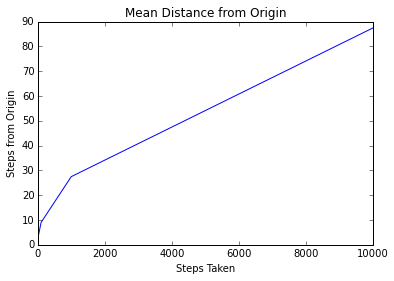

In [5]:
# def drunkTestP(numTrials = 50):
#     stepsTaken = [10, 100, 1000, 10000]
#     meanDistances = []
#     for numSteps in stepsTaken:
#         distances = simWalks(numSteps, numTrials)
#         meanDistances.append(sum(distances)/len(distances))
#     pylab.plot(stepsTaken, meanDistances)
#     pylab.title('Mean Distance from Origin')
#     pylab.xlabel('Steps Taken')
#     pylab.ylabel('Steps from Origin')
#     pylab.show()

# drunkTestP()

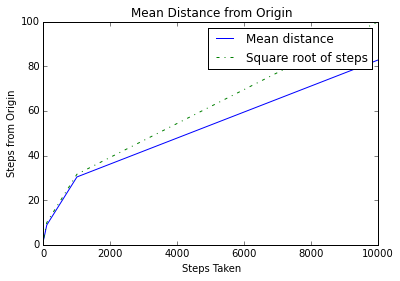

In [7]:
def drunkTestP1(numTrials = 50):
    stepsTaken = [10, 100, 1000, 10000]
    meanDistances = []
    squareRootOfSteps = []
    for numSteps in stepsTaken:
        distances = simWalks(numSteps, numTrials)
        meanDistances.append(sum(distances)/len(distances))
        squareRootOfSteps.append(numSteps**0.5)
    pylab.plot(stepsTaken, meanDistances, 'b-',
               label = 'Mean distance')
    pylab.plot(stepsTaken, squareRootOfSteps, 'g-.',
               label = 'Square root of steps')
    pylab.title('Mean Distance from Origin')
    pylab.xlabel('Steps Taken')
    pylab.ylabel('Steps from Origin')
    pylab.legend()
    pylab.show()

drunkTestP1()

In [4]:
#Look at different kinds of drunks

class ColdDrunk(Drunk):
    def takeStep(self):
        stepChoices =\
            [(0.0,0.95), (0.0,-1.0), (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

class EDrunk(Drunk):
    def takeStep(self):
        deltaX = random.random()
        if random.random() < 0.5:
            deltaX = -deltaX
        deltaY = random.random()
        if random.random() < 0.5:
            deltaY = -deltaY
        return (deltaX, deltaY)

# New version of simWalks

def simWalks(numSteps, numTrials, dClass):
    homer = dClass('Homer')
    origin = Location(0, 0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(homer, origin)
        distances.append(walk(f, homer, numSteps))
    return distances


def drunkTestP(numTrials = 50):
    stepsTaken = [10, 100, 1000, 10000]
    for dClass in (UsualDrunk, ColdDrunk, EDrunk):
        meanDistances = []
        for numSteps in stepsTaken:
            distances = simWalks(numSteps, numTrials, dClass)
            meanDistances.append(sum(distances)/len(distances))
        pylab.plot(stepsTaken, meanDistances,
                   label = dClass.__name__)
        pylab.title('Mean Distance from Origin')
        pylab.xlabel('Steps Taken')
        pylab.ylabel('Steps from Origin')
        pylab.legend(loc = 'upper left')
    pylab.show()

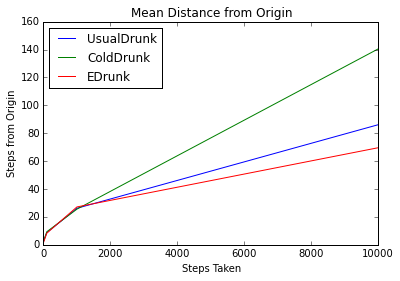

In [5]:
drunkTestP()

### L2 Problem 2

In [2]:
import random

In [12]:
def genEven():
    '''
    Returns a random even number x, where 0 <= x < 100
    '''
    while True:
        randNum = random.randint(0, 98)
        if randNum % 2 == 1:
            continue
        return randNum

In [13]:
for i in range(5):
    print genEven()

70
32
88
40
98


In [16]:
random.randint?

### L2 Problem 6

In [3]:
import random
mylist = []

for i in xrange(random.randint(1, 10)):
    random.seed(0)
    if random.randint(1, 10) > 3:
        number = random.randint(1, 10)
        mylist.append(number)
print mylist

[8, 8, 8, 8, 8]


Why the result is always 8? In fact, if seed is set, then `random` module will always give same sequence of numbers.

In [6]:
random.seed(0)
randNumList = []
for i in range(10):
    randNumList.append(random.randint(1,10))
randNumList

[9, 8, 5, 3, 6, 5, 8, 4, 5, 6]

In [7]:
random.seed(0)
randNumList = []
for i in range(5):
    randNumList.append(random.randint(1,10))
randNumList

[9, 8, 5, 3, 6]

It explains how `[8, 8, 8, 8, 8]` comes.